In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('adanient.csv', parse_dates=True, index_col='Date')

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-09,134.949997,139.649994,134.100006,139.000000,137.840424,2682715
2019-10-10,138.000000,139.100006,135.300003,137.399994,136.253769,2413888
2019-10-11,137.449997,138.800003,134.600006,136.949997,135.807526,2780875
2019-10-14,137.899994,152.399994,137.000000,147.100006,145.872864,10795909
2019-10-15,147.699997,155.850006,146.600006,155.000000,153.706955,11048872


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-30,3447.949951,3523.800049,3371.100098,3455.750000,3455.750000,4307707
2022-10-03,3440.000000,3460.050049,3110.199951,3157.300049,3157.300049,7578847
2022-10-04,3230.000000,3291.199951,3125.000000,3237.699951,3237.699951,5642467
2022-10-06,3270.000000,3318.800049,3208.050049,3285.000000,3285.000000,2845165
2022-10-07,3280.000000,3310.949951,3228.149902,3277.600098,3277.600098,1930275


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 746 entries, 2019-10-09 to 2022-10-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       746 non-null    float64
 1   High       746 non-null    float64
 2   Low        746 non-null    float64
 3   Close      746 non-null    float64
 4   Adj Close  746 non-null    float64
 5   Volume     746 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 40.8 KB


In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.shape

(746, 6)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,746.000000,746.000000,746.000000,746.000000,746.000000,7.460000e+02
mean,1117.207439,1138.974931,1096.478821,1118.870443,1118.094756,4.778698e+06
std,919.910634,934.869073,903.819673,920.106972,920.222604,4.986480e+06
min,121.000000,129.800003,116.400002,120.900002,120.768463,2.722610e+05
25%,223.187500,227.362495,219.062500,225.524998,223.643604,1.929819e+06
50%,1113.500000,1151.500000,1085.174988,1133.149964,1131.917114,3.275804e+06
75%,1711.649994,1733.750000,1683.712463,1709.112457,1708.386170,5.551376e+06
max,3837.649902,3885.000000,3812.000000,3834.550049,3834.550049,4.926454e+07


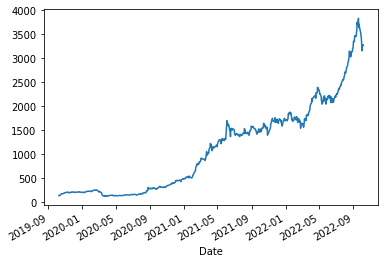

In [ ]:
df.Close.plot()

In [ ]:
adani = df['Close']

In [ ]:
adani.reset_index(drop=True, inplace=True)

In [ ]:
adani.shape

(746,)

In [ ]:
adani = pd.DataFrame(adani)

In [ ]:
adani.head()

,Close
0,139.000000
1,137.399994
2,136.949997
3,147.100006
4,155.000000


In [ ]:
 train = adani.iloc[500:730]
 test = adani.iloc[730:]

In [ ]:
train.shape, test.shape

((230, 1), (16, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)


In [ ]:
scaled_train

array([[0.07172593],
       [0.0787421 ],
       [0.114007  ],
       [0.09981364],
       [0.07862708],
       [0.08794364],
       [0.0904051 ],
       [0.06645807],
       [0.06148922],
       [0.06684913],
       [0.07729291],
       [0.        ],
       [0.01152489],
       [0.02150859],
       [0.0341607 ],
       [0.0401877 ],
       [0.04182094],
       [0.07807501],
       [0.10899215],
       [0.11837773],
       [0.12254145],
       [0.14108251],
       [0.16148696],
       [0.14402702],
       [0.14165761],
       [0.13351427],
       [0.12753327],
       [0.14234772],
       [0.16406338],
       [0.167698  ],
       [0.12468082],
       [0.12261047],
       [0.12159827],
       [0.13560764],
       [0.15352761],
       [0.14241675],
       [0.11366195],
       [0.12877546],
       [0.14582133],
       [0.14892684],
       [0.15727725],
       [0.14768466],
       [0.14793767],
       [0.1365278 ],
       [0.13963332],
       [0.11352396],
       [0.08805866],
       [0.102

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of the outp

In [ ]:
length = 16
batch_size = 32

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length = length, batch_size=batch_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [ ]:
n_features = 1

In [ ]:
model = Sequential()

model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 30)                960       
                                                                 
 dropout_7 (Dropout)         (None, 30)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


7/7 [==============================] - 1s 13ms/step - loss: 0.0426
Epoch 2/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0269
Epoch 3/10
7/7 [==============================] - 0s 12ms/step - loss: 0.0132
Epoch 4/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0092
Epoch 5/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0109
Epoch 6/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0080
Epoch 7/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0085
Epoch 8/10
7/7 [==============================] - 0s 12ms/step - loss: 0.0047
Epoch 9/10
7/7 [==============================] - 0s 15ms/step - loss: 0.0058
Epoch 10/10
7/7 [==============================] - 0s 19ms/step - loss: 0.0066


In [ ]:
losses = pd.DataFrame(model.history.history)

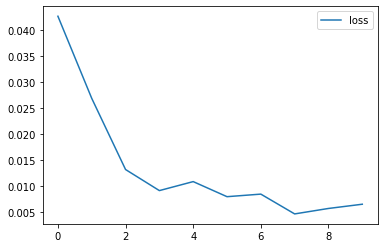

In [ ]:
losses.plot()

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
first_eval_batch

array([[0.75089131],
       [0.7987393 ],
       [0.76731615],
       [0.80099375],
       [0.802397  ],
       [0.82620598],
       [0.84410292],
       [0.90048536],
       [0.89622965],
       [0.93729151],
       [0.9547514 ],
       [0.94971358],
       [0.94437664],
       [0.95017366],
       [0.99250073],
       [1.        ]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,length,1))

In [ ]:
first_eval_batch

array([[[0.75089131],
        [0.7987393 ],
        [0.76731615],
        [0.80099375],
        [0.802397  ],
        [0.82620598],
        [0.84410292],
        [0.90048536],
        [0.89622965],
        [0.93729151],
        [0.9547514 ],
        [0.94971358],
        [0.94437664],
        [0.95017366],
        [0.99250073],
        [1.        ]]])

In [ ]:
model.predict(first_eval_batch)

array([[0.94137824]], dtype=float32)

In [ ]:
scaled_test[0]

array([1.0812495])

In [ ]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_pred.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_pred

[array([0.94137824], dtype=float32),
 array([0.92996556], dtype=float32),
 array([0.92449373], dtype=float32),
 array([0.8873236], dtype=float32),
 array([0.88743776], dtype=float32),
 array([0.8858676], dtype=float32),
 array([0.86914074], dtype=float32),
 array([0.87620175], dtype=float32),
 array([0.874092], dtype=float32),
 array([0.86089134], dtype=float32),
 array([0.8699283], dtype=float32),
 array([0.87216634], dtype=float32),
 array([0.8634848], dtype=float32),
 array([0.8621696], dtype=float32),
 array([0.8737329], dtype=float32),
 array([0.87625724], dtype=float32)]

In [ ]:
true_pred = scaler.inverse_transform(test_pred)

In [ ]:
true_pred

array([[3444.68275959],
       [3419.87672809],
       [3407.98344129],
       [3327.19234224],
       [3327.44043754],
       [3324.02760498],
       [3287.67095616],
       [3303.01840314],
       [3298.43272114],
       [3269.74046794],
       [3289.38274892],
       [3294.24723044],
       [3275.37747805],
       [3272.51887613],
       [3297.65228978],
       [3303.13901762]])

In [ ]:
test['prediction'] = true_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test

,Close,prediction
730,3748.699951,3444.682760
731,3702.199951,3419.876728
732,3778.649902,3407.983441
733,3834.550049,3327.192342
734,3640.100098,3327.440438
735,3716.300049,3324.027605
736,3674.300049,3287.670956
737,3586.199951,3303.018403
738,3559.100098,3298.432721
739,3548.750000,3269.740468


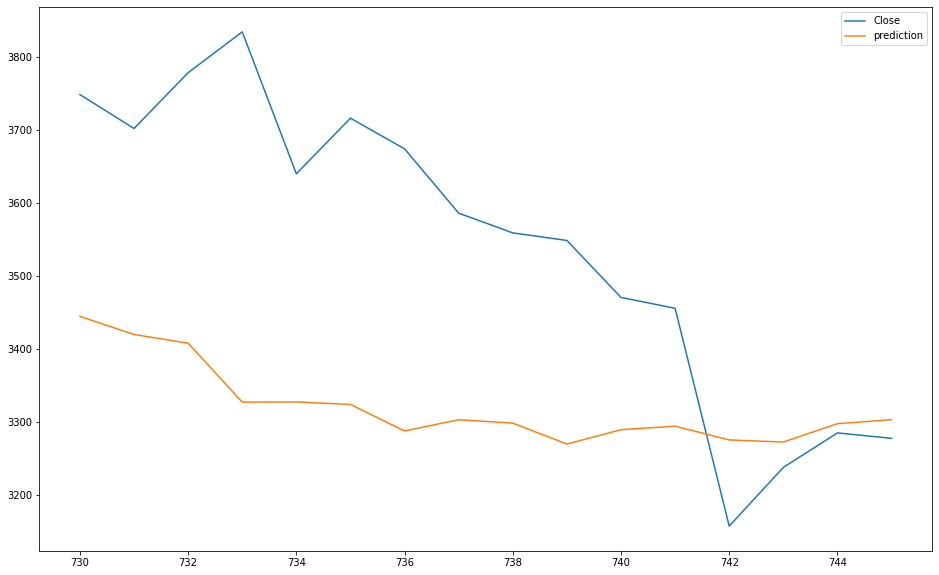

In [ ]:
test.plot(figsize=(16,10))


In [ ]:
full_scaler = MinMaxScaler()

sc = full_scaler.fit_transform(adani)

In [ ]:
generator = TimeseriesGenerator(sc,sc,
                                length=length,batch_size=32)

In [ ]:
model = Sequential()

model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


23/23 [==============================] - 1s 12ms/step - loss: 0.0084
Epoch 2/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0082
Epoch 3/10
23/23 [==============================] - 0s 13ms/step - loss: 0.0082
Epoch 4/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0124
Epoch 5/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0083
Epoch 6/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 7/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0040
Epoch 8/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0029
Epoch 9/10
23/23 [==============================] - 0s 13ms/step - loss: 0.0025
Epoch 10/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0025


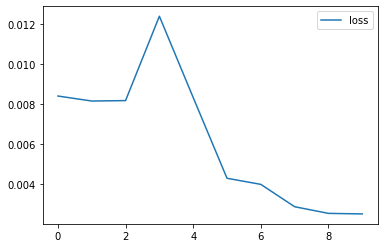

In [ ]:
full_model_loss = pd.DataFrame(model.history.history)
full_model_loss.plot()

In [ ]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(20):
  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast

array([[3623.31551732],
       [3636.50589555],
       [3657.59075674],
       [3683.01903455],
       [3708.42088342],
       [3726.97012001],
       [3768.71982936],
       [3772.74506215],
       [3786.81433254],
       [3806.76533993],
       [3821.05770175],
       [3850.05958824],
       [3854.14493394],
       [3868.01572809],
       [3877.60503227],
       [3883.60414491],
       [3896.88806089],
       [3905.9464541 ],
       [3913.47326372],
       [3923.9961317 ]])

In [ ]:
forecast.flatten()

array([3623.31551732, 3636.50589555, 3657.59075674, 3683.01903455,
       3708.42088342, 3726.97012001, 3768.71982936, 3772.74506215,
       3786.81433254, 3806.76533993, 3821.05770175, 3850.05958824,
       3854.14493394, 3868.01572809, 3877.60503227, 3883.60414491,
       3896.88806089, 3905.9464541 , 3913.47326372, 3923.9961317 ])

In [ ]:
df_array = np.array(adani)
df_array

array([[ 139.      ],
       [ 137.399994],
       [ 136.949997],
       [ 147.100006],
       [ 155.      ],
       [ 160.149994],
       [ 162.550003],
       [ 175.100006],
       [ 178.649994],
       [ 176.449997],
       [ 179.      ],
       [ 181.300003],
       [ 183.399994],
       [ 195.550003],
       [ 195.75    ],
       [ 199.649994],
       [ 200.449997],
       [ 200.899994],
       [ 200.550003],
       [ 207.550003],
       [ 209.149994],
       [ 208.050003],
       [ 210.850006],
       [ 198.199997],
       [ 202.300003],
       [ 203.600006],
       [ 201.149994],
       [ 199.699997],
       [ 205.699997],
       [ 205.5     ],
       [ 203.449997],
       [ 215.199997],
       [ 210.600006],
       [ 213.550003],
       [ 213.100006],
       [ 214.899994],
       [ 209.      ],
       [ 207.850006],
       [ 212.449997],
       [ 208.399994],
       [ 206.5     ],
       [ 207.449997],
       [ 204.199997],
       [ 206.149994],
       [ 210.399994],
       [ 2

In [ ]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

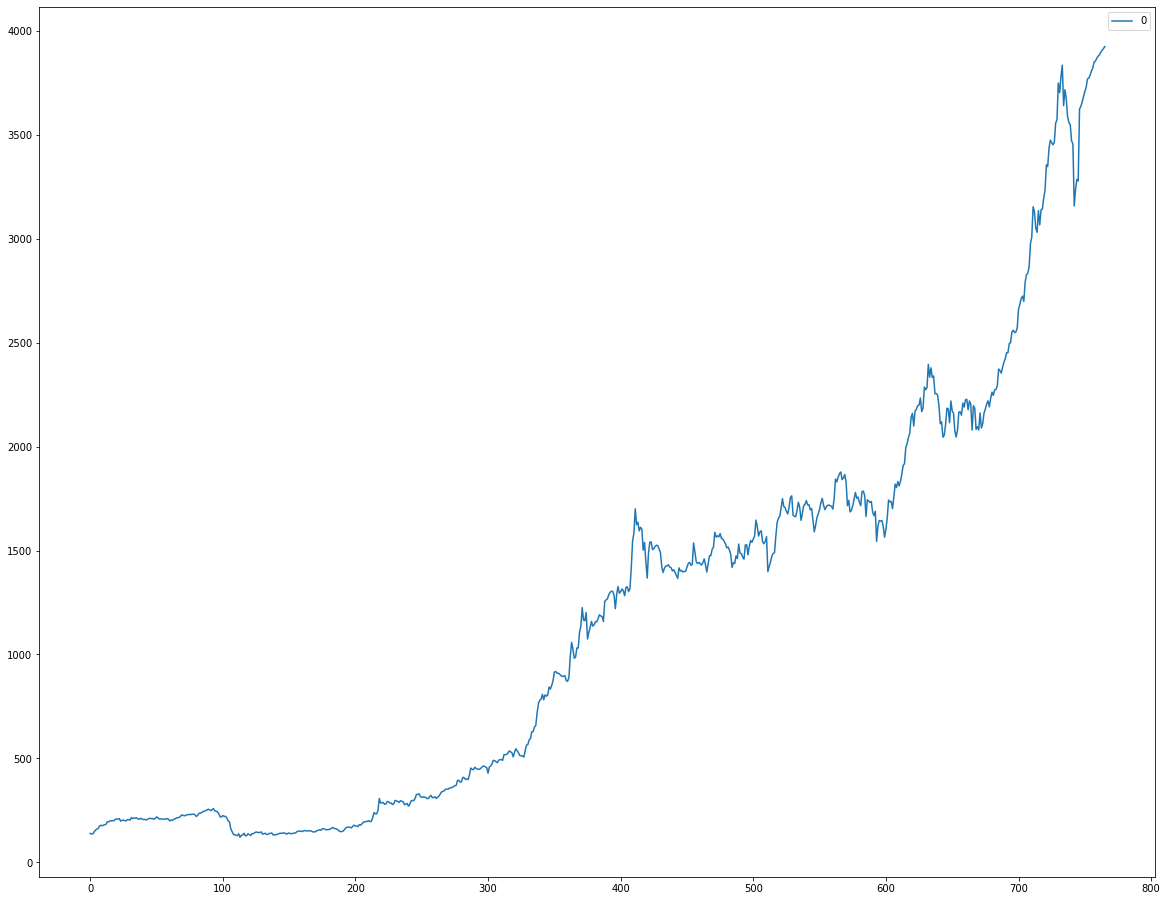

In [ ]:

full_data.plot(figsize=(20,16))


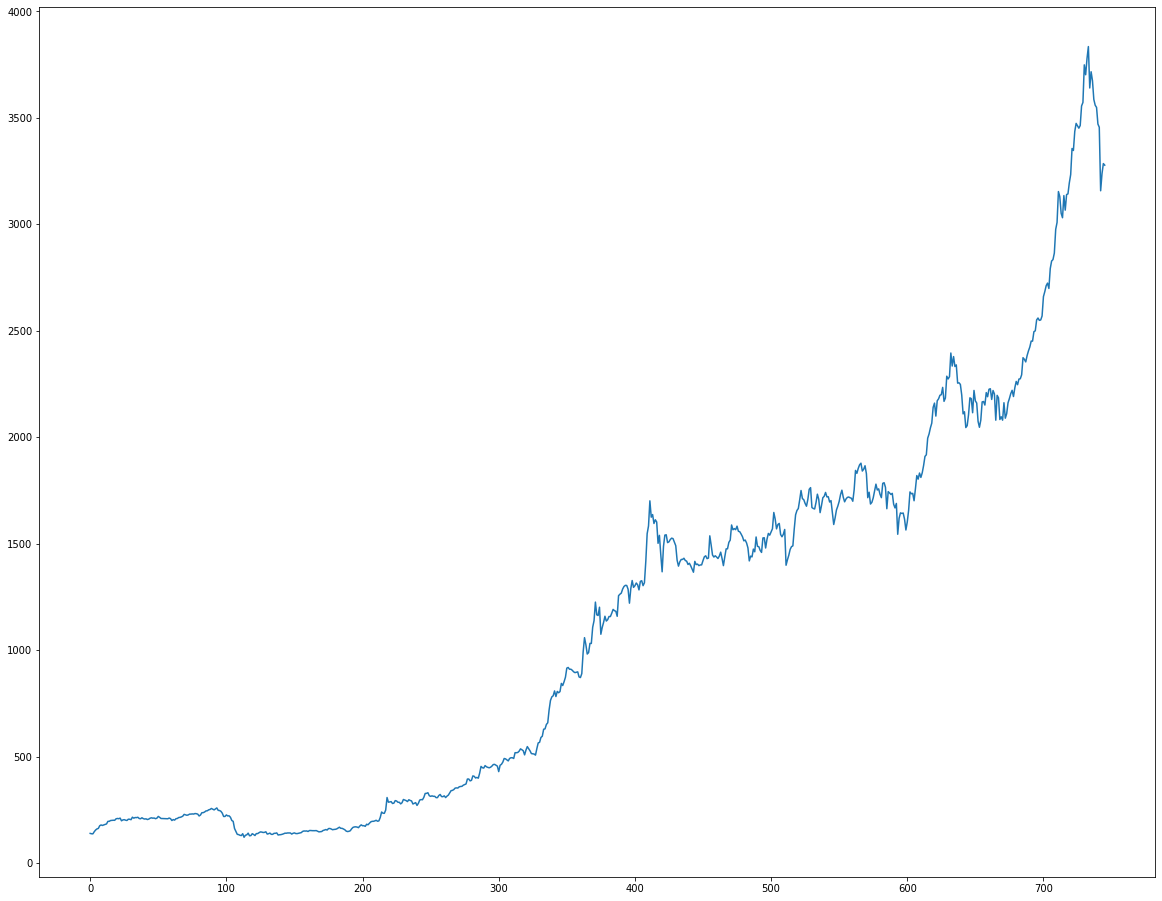

In [ ]:
df.Close.plot(figsize=(20,16))


LSTM MODEL


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
scaled_test.shape

(16, 1)

In [ ]:
length = 15

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length, batch_size=32)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                           length=length, batch_size=32)

In [ ]:
model = Sequential()

model.add(LSTM(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop],shuffle=False)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


7/7 [==============================] - 2s 69ms/step - loss: 0.1369 - val_loss: 0.5293
Epoch 2/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0733 - val_loss: 0.2986
Epoch 3/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0377 - val_loss: 0.1327
Epoch 4/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0190 - val_loss: 0.0367
Epoch 5/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0161 - val_loss: 0.0036
Epoch 6/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0185 - val_loss: 6.8238e-05
Epoch 7/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0187 - val_loss: 2.2163e-04
Epoch 8/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0130 - val_loss: 5.9022e-04


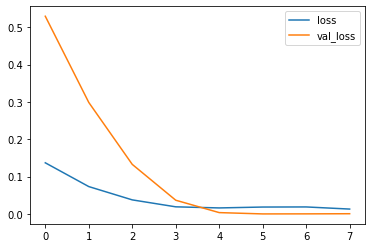

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_pred.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


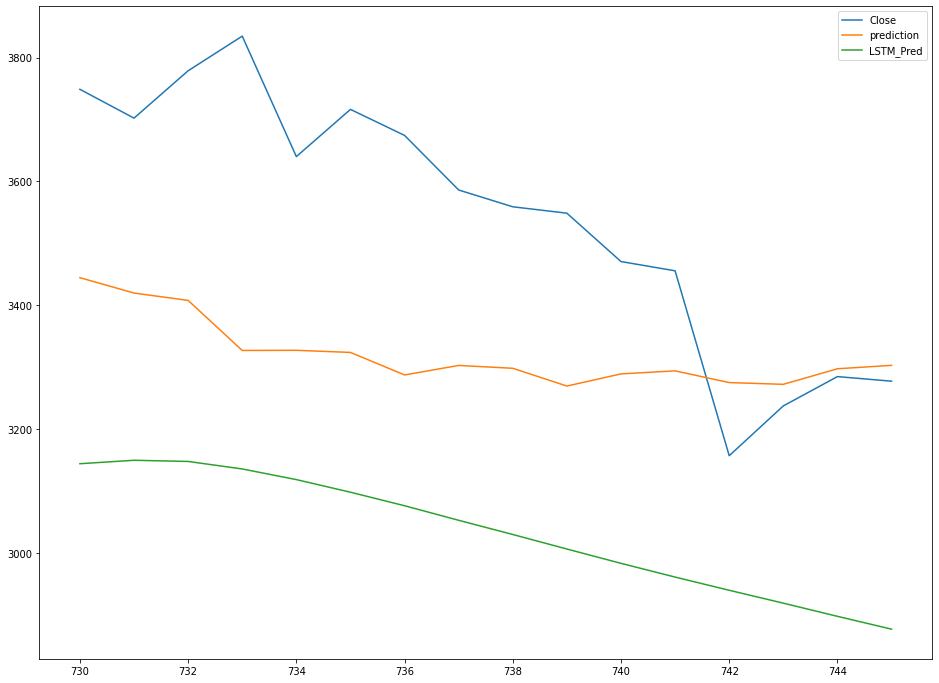

In [ ]:
true_pred = scaler.inverse_transform(test_pred)
test['LSTM_Pred'] = true_pred
test.plot(figsize=(16,12))

FB Prophet


In [ ]:
df.reset_index(inplace=True)

In [ ]:
data = df[['Date','Close']]

In [ ]:
data.head()

,Date,Close
0,2019-10-09,139.000000
1,2019-10-10,137.399994
2,2019-10-11,136.949997
3,2019-10-14,147.100006
4,2019-10-15,155.000000


In [ ]:
data = data.rename(columns= {'Date':'ds','Close':'y'})

In [ ]:
data.head()

,ds,y
0,2019-10-09,139.000000
1,2019-10-10,137.399994
2,2019-10-11,136.949997
3,2019-10-14,147.100006
4,2019-10-15,155.000000


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 4.6 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
import fbprophet

ModuleNotFoundError: ignored

In [ ]:
pip install --upgrade pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: pystan
    Found existing installation: pystan 2.19.1.1
    Uninstalling pystan-2.19.1.1:
      Successfully uninstalled pystan-2.19.1.1


In [ ]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
    Running setup.py install for fbprophet ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-n746s8iz/fbprophet_fc0c4ba614ea4f96b93c03e9e4343fc3/setup.py'"'"'; __file__='"'"'/tmp/pip-install-n746s8iz/fbprophet_fc0c4ba614ea4f96b93c03e9e4343fc3/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.re

In [ ]:
pip uninstall fbprophet pystan

Found existing installation: pystan 3.3.0
Uninstalling pystan-3.3.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pystan-3.3.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/stan/*
Proceed (y/n)? y
  Successfully uninstalled pystan-3.3.0


In [ ]:
pip install pystan 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)


In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet(changepoint_prior_scale=0.15,daily_seasonality=True)
m.fit(data)

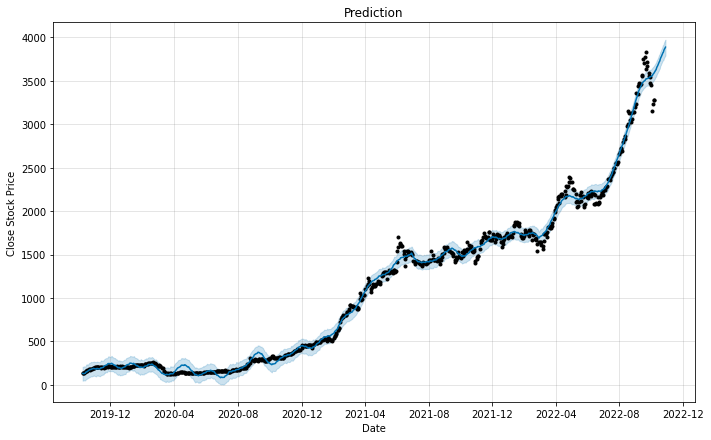

In [ ]:
future = m.make_future_dataframe(periods=21)
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction")
plt.xlabel('Date')
plt.ylabel('Close Stock Price')
plt.show()

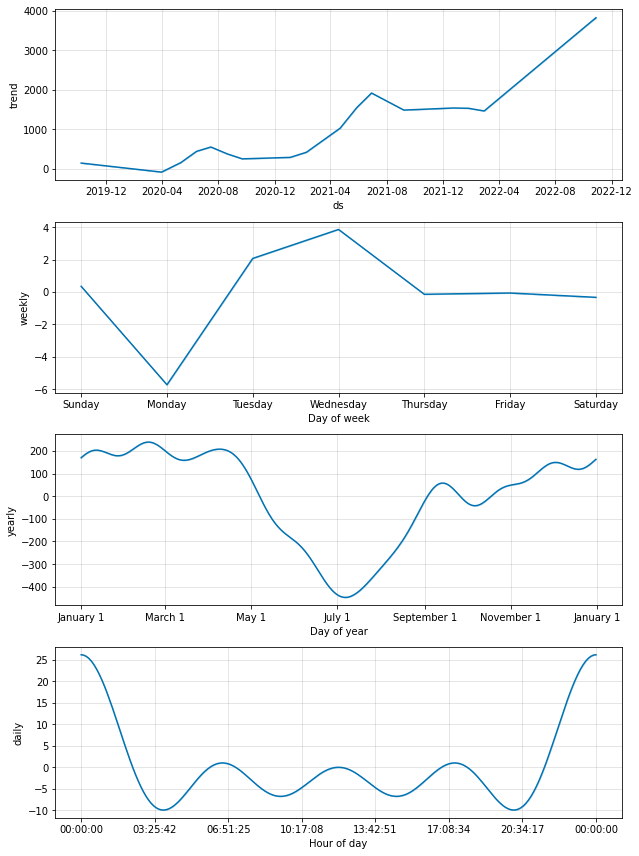

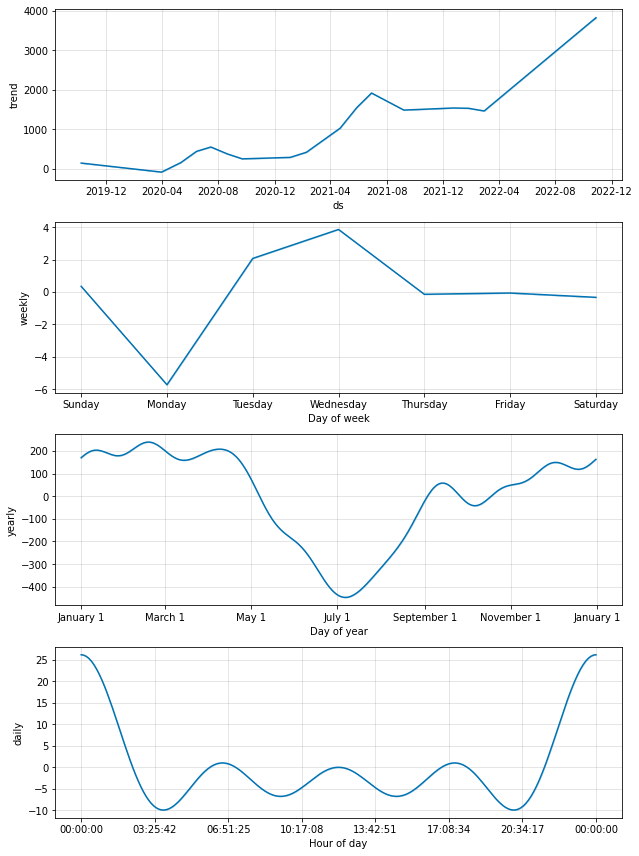

In [ ]:
m.plot_components(prediction)